In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_style("darkgrid")
sns.set(font_scale=1.5)
%matplotlib inline

In [2]:
def get_scheduled_monthly_flights_summaries():
    data = pd.read_csv('../../data/external/monthly-scheduled-flights-bts.csv')
    data['Day'] = 1
    data['Month'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
    
    # Strip out commas, convert to ints
    for col in ['TOTAL', 'DOMESTIC', 'INTERNATIONAL']:
        data[col] = data[col].str.replace(',', '').astype('int')
    
    return data.drop(['Year', 'Day'], axis=1).set_index('Month')


flights = get_scheduled_monthly_flights_summaries()
flights.tail()

,DOMESTIC,INTERNATIONAL,TOTAL
Month,,,
2017-08-01,735373,143786,879159
2017-09-01,652125,120216,772341
2017-10-01,691702,125356,817058
2017-11-01,656416,119405,775821
2017-12-01,663901,133128,797029


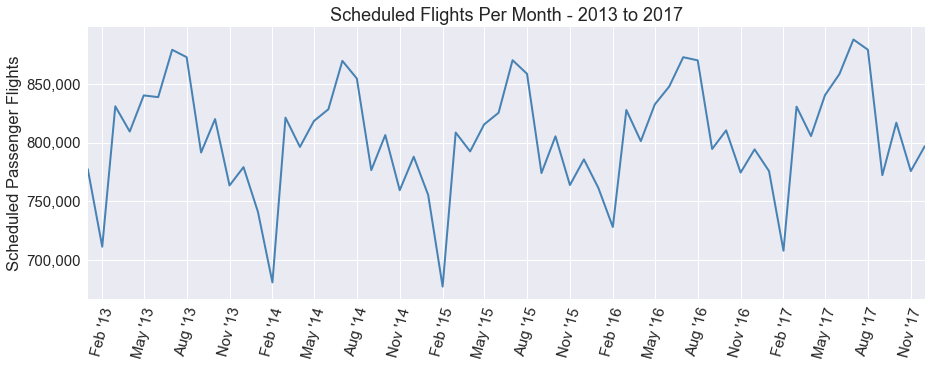

In [6]:
def plot_flights_per_month(flights):

    fig, ax = plt.subplots()
    _ = fig.set_size_inches(15, 5)
    _ = ax.plot(flights.index, flights['TOTAL'], linewidth=2, markevery=3, color='steelblue')

    quarter = mdates.MonthLocator(interval=3)  # quarterly
    months = mdates.MonthLocator()  # every month
    monthFmt = mdates.DateFormatter("%b '%y")

    # format the xticks
    _ = ax.xaxis.set_major_locator(quarter)
    _ = ax.xaxis.set_major_formatter(monthFmt)
    _ = plt.xticks(rotation=75)

    # format y ticks
    _ = ax.yaxis.set_major_locator(plt.AutoLocator())
    _ = ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    

    # Set the limits
    _ = ax.set_xlim(flights.index.min(), flights.index.max())

    _ = plt.ylabel('Scheduled Passenger Flights')
    _ = plt.title('Scheduled Flights Per Month - 2013 to 2017')

    plt.savefig('../../reports/figures/total-flights-per-month.png', bbox_inches='tight')
    plt.show()

    
# Plot 5 years worth of data
month_count = 5 * 12
plot_flights_per_month(flights[-month_count:])